# Part I

### Libraries Importation

In [80]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sns.set()
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# Summary
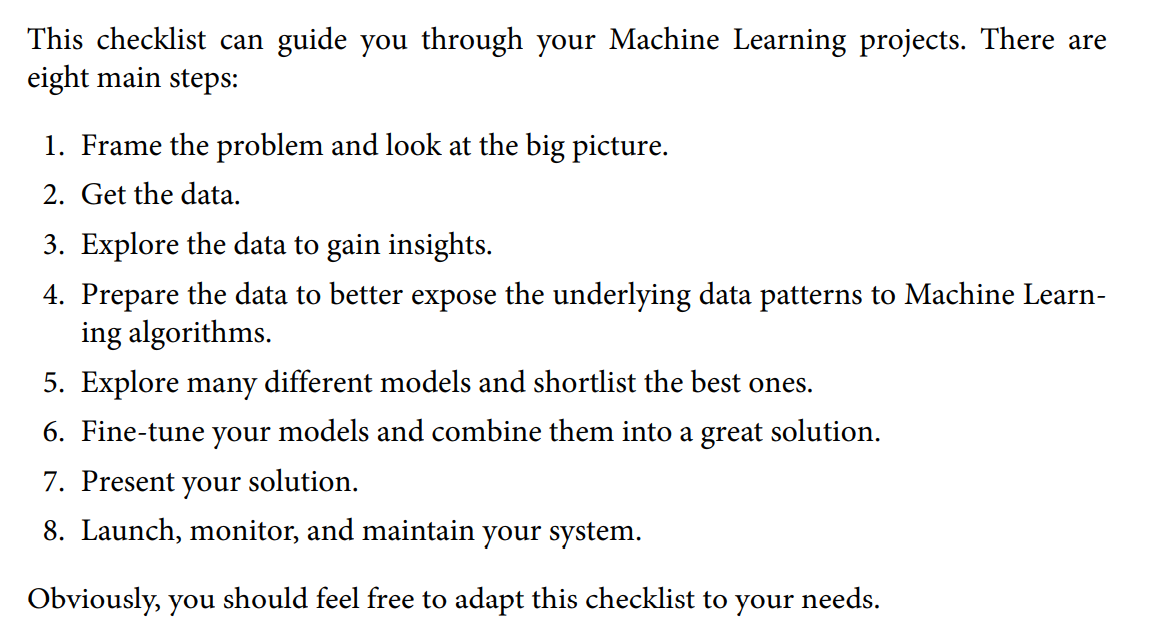

# 1. Frame the problem and look at the big image

###### Le diabète est une maladie très courante et, en plus, cause de graves problèmes de santé tels que des lésions rénales mortelles ou la cécité ; il peut conduire le patient à la mort. Il n'y a pas encore de remède exact pour cette maladie, mais elle est gérable avec des médicaments et un régime alimentaire. De cette manière, l'importance d'un diagnostic correct du diabète est très importante pour identifier les maladies à un stade précoce et prendre les précautions nécessaires. Il y a beaucoup de données accumulées à ce sujet, car il y a tellement de patients atteints de cette maladie. Cela permet aux chercheurs d'utiliser des techniques d'exploration de données sur ce sujet. Cette étude est proposée pour classer le diabète en utilisant des techniques d'exploration de données.

###### Cet ensemble de données provient de l Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est diabétique ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces instances à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne Pima.
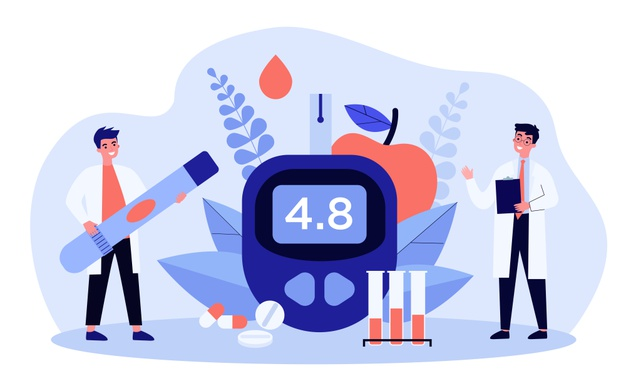


# 2. Get the data

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\diabetes.csv')

# 3. Explore the data to gain insights

In [3]:
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


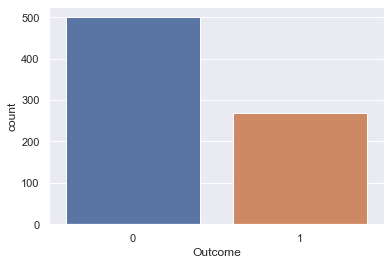

In [5]:
sns.countplot(x='Outcome',data=data)
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

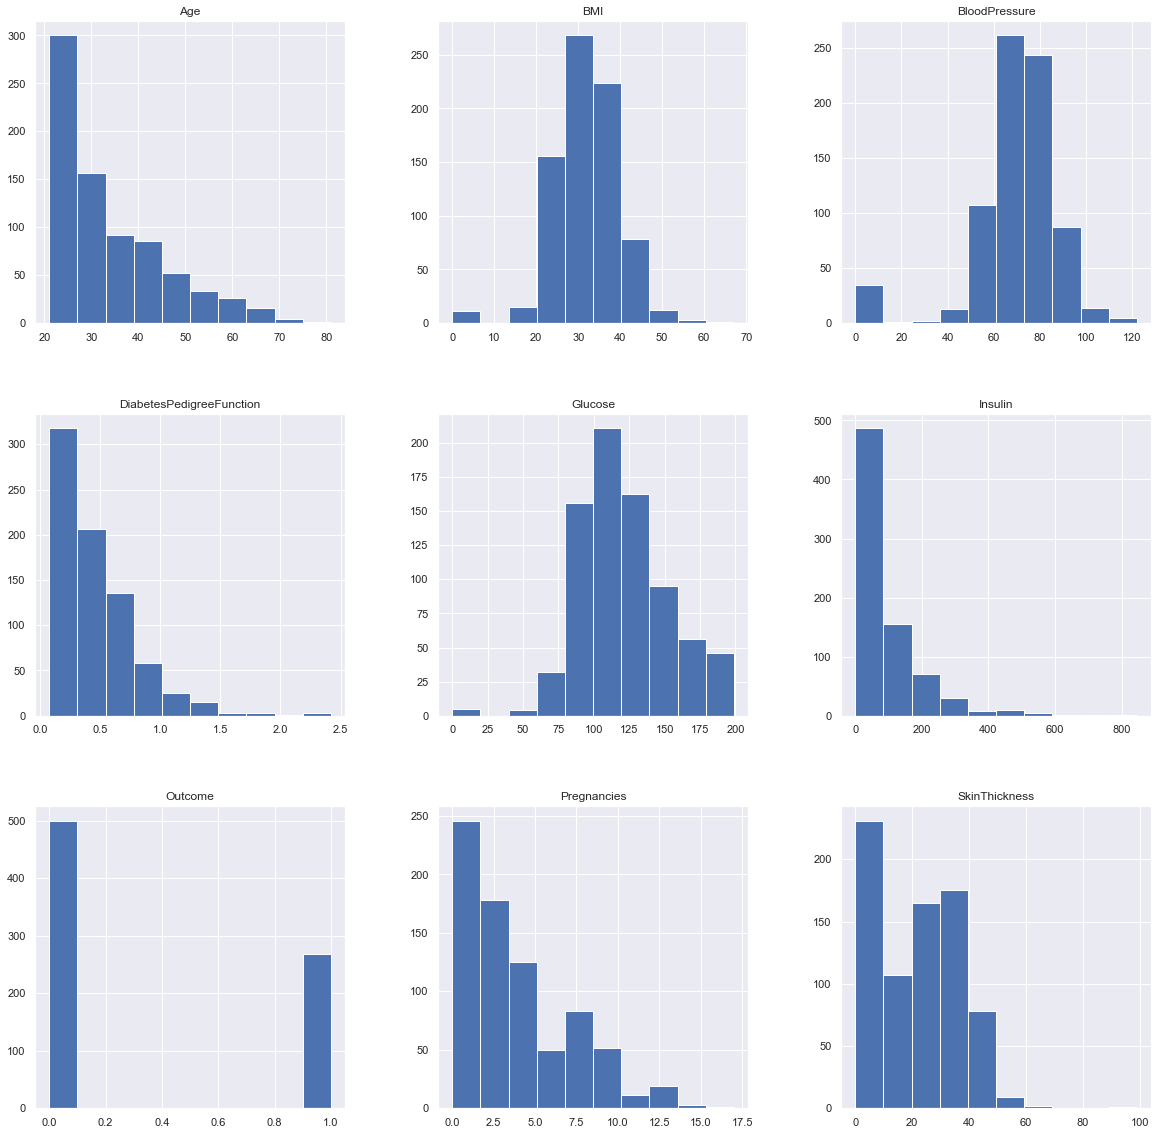

In [7]:
p = data.hist(figsize = (20,20))

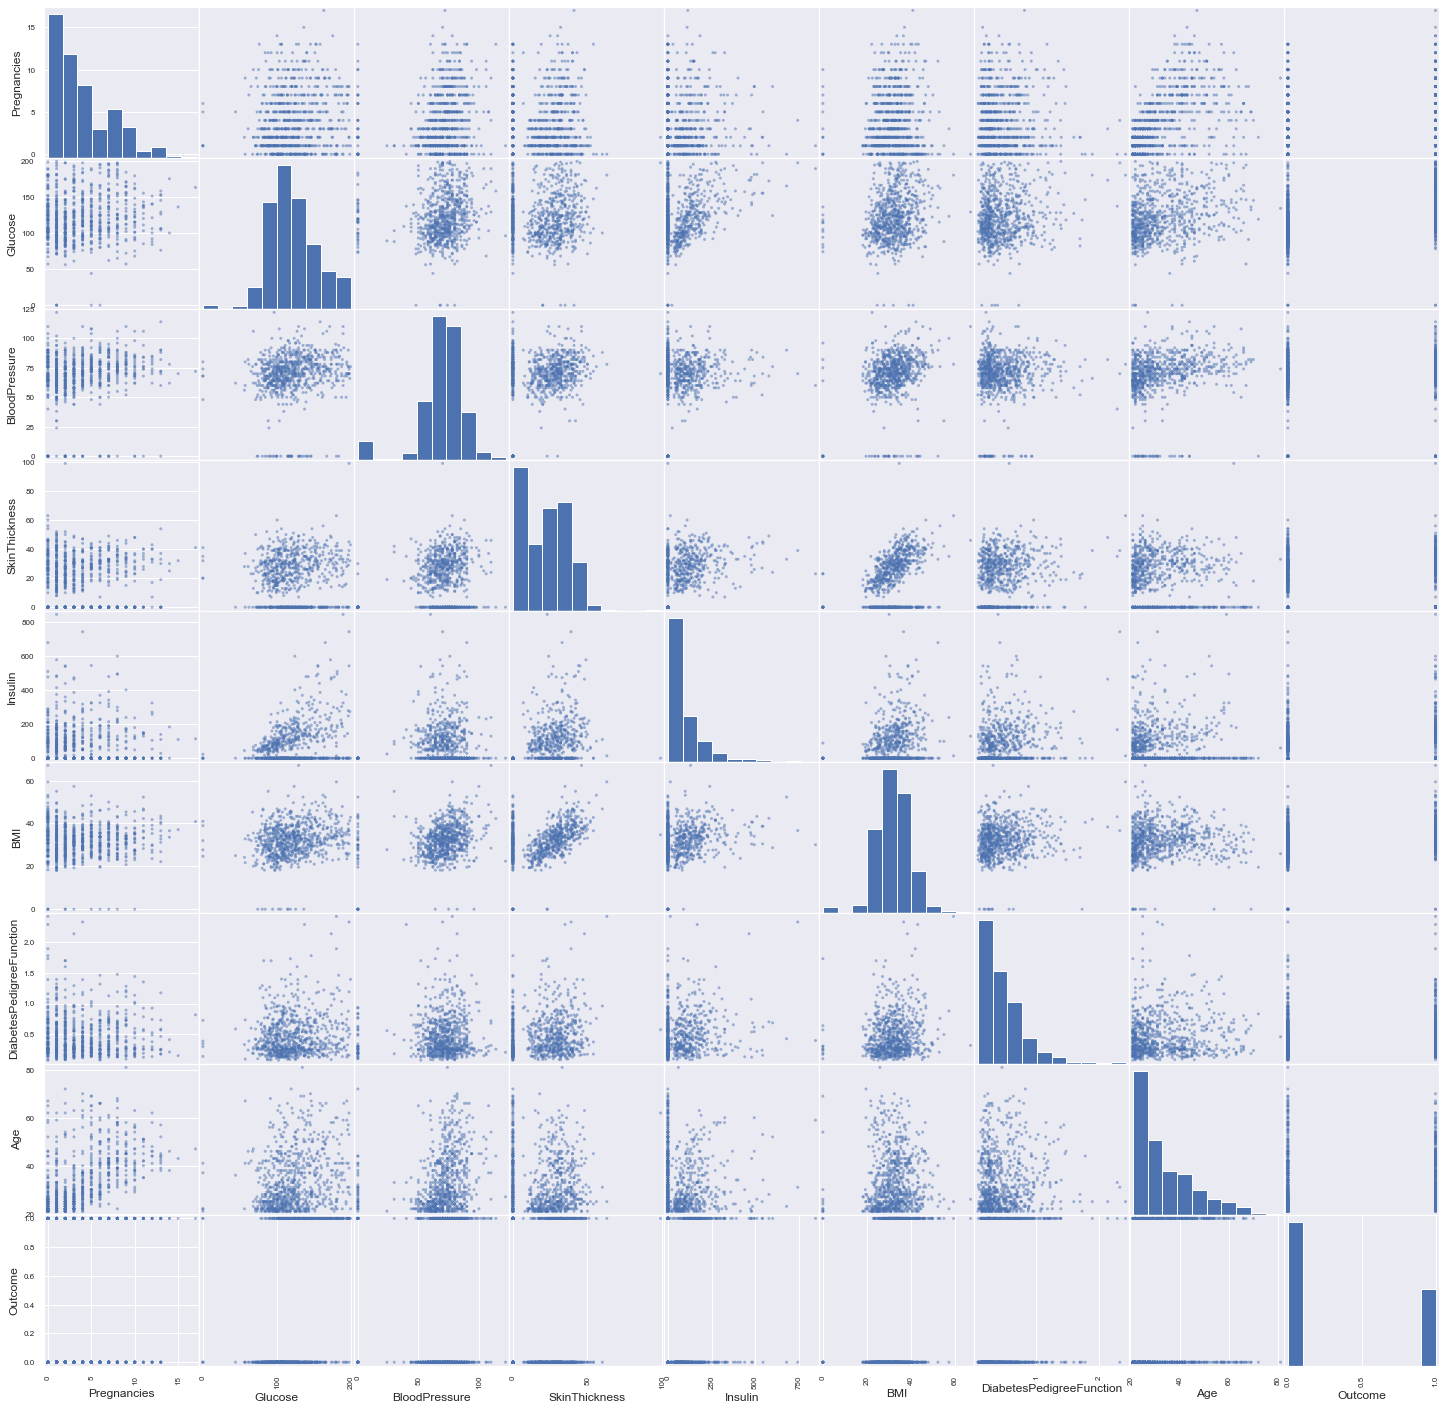

In [8]:
p=scatter_matrix(data,figsize=(25, 25))

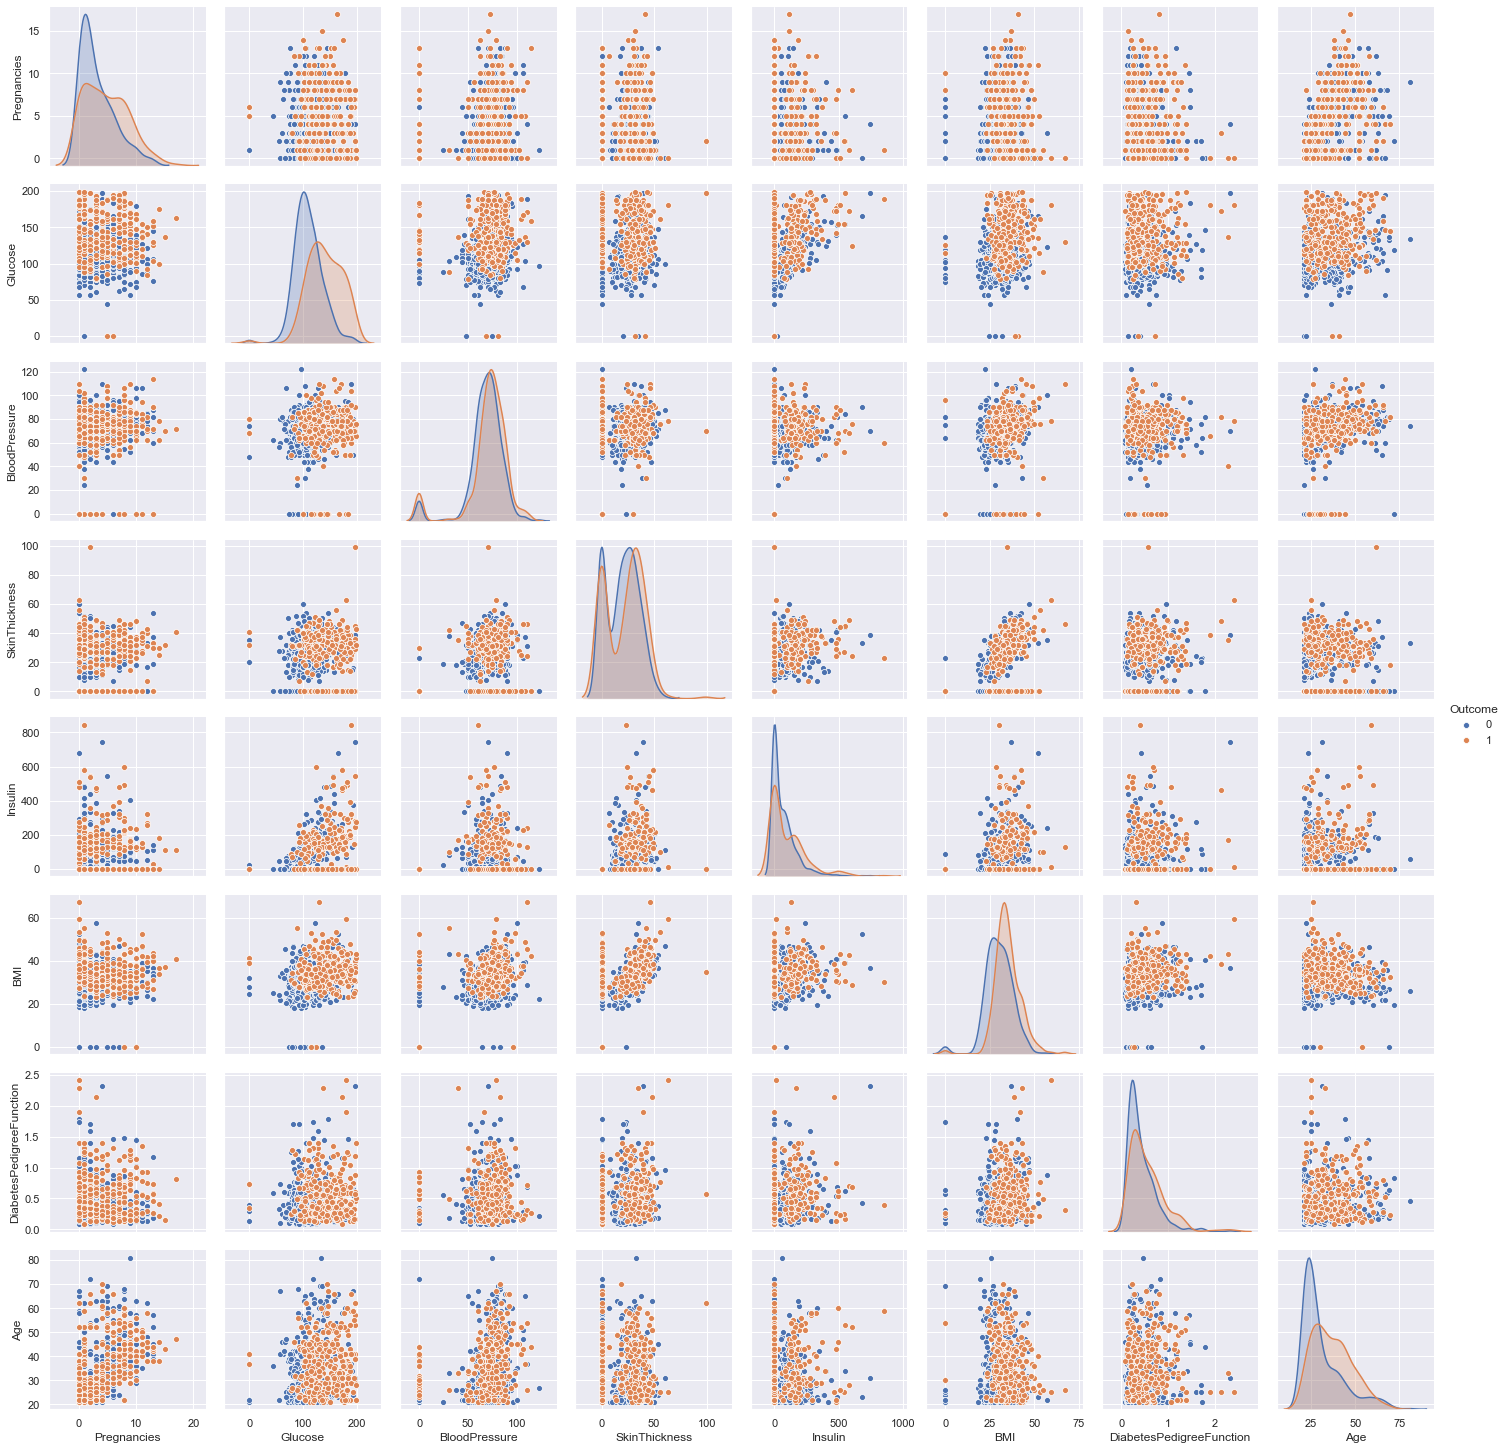

In [9]:
p=sns.pairplot(data, hue = 'Outcome')

### Corrélation des différentes inputs

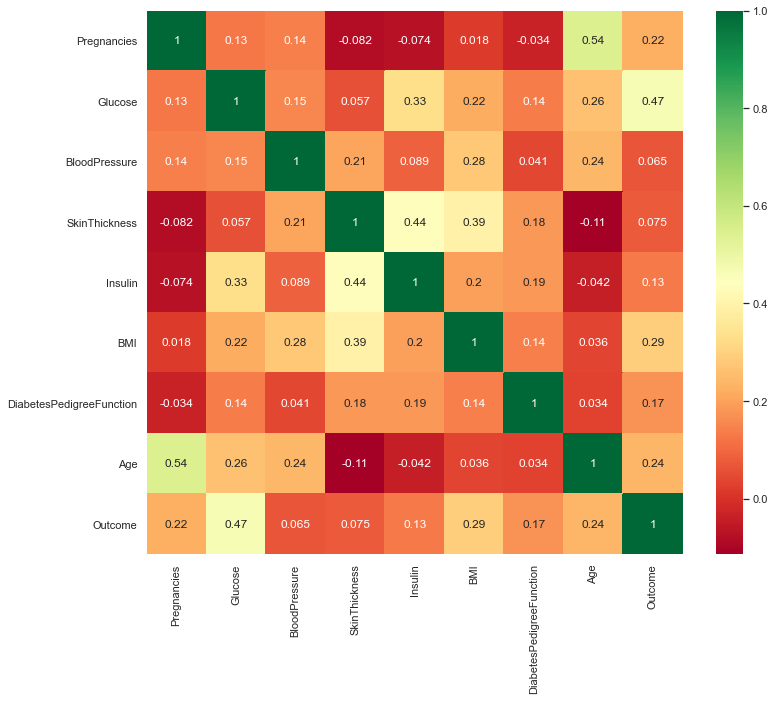

In [10]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  

In [11]:
sc_X = StandardScaler() 
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
X.head

<bound method NDFrame.head of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     Diab

In [27]:
Y = data.Outcome

### Splitting the Data

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)

# 5. Explore many different models and shortlist the best ones.

### K-NN

In [92]:
test_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    test_scores.append(knn.score(X_test,y_test))

In [93]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.953125 % and k = [11]


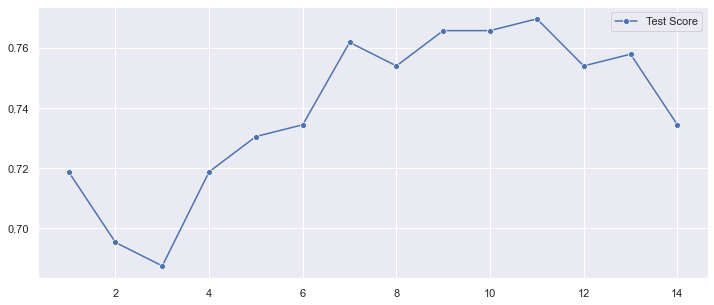

In [94]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [95]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125

### Cross Validation

###### Cross-Validation is a method for testing the performance of a machine learning predictive model. ... The validation process involves deciding whether numerical results quantifying hypothetical relationships between variables are acceptable as descriptions of the data.
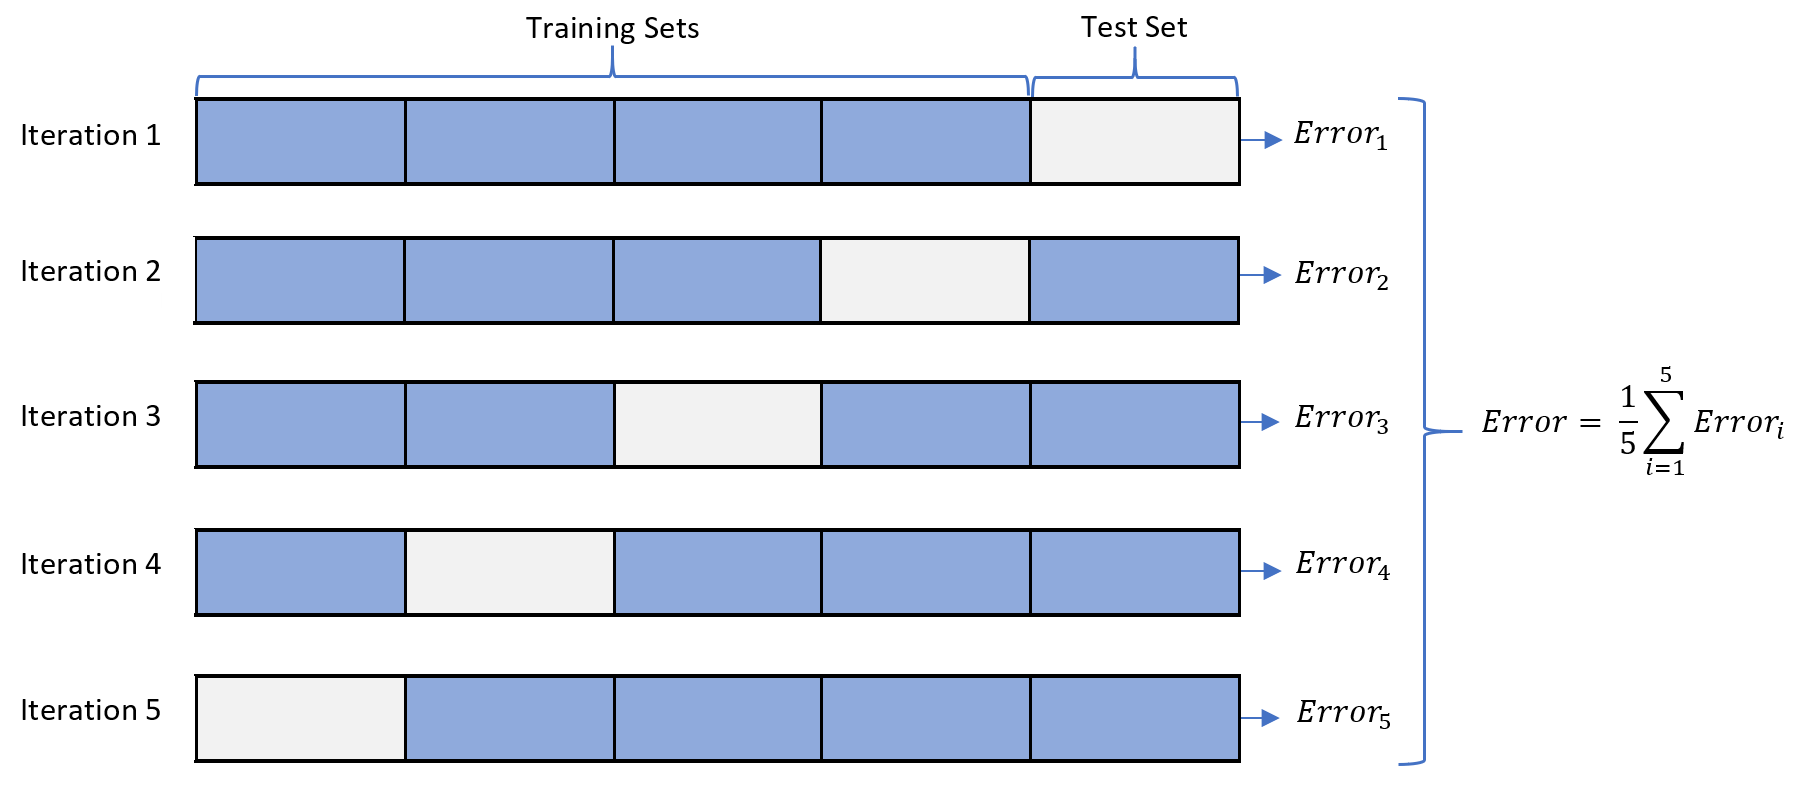

In [96]:
cross_val_knn = cross_val_score(knn,X_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_knn

array([0.75728155, 0.76699029, 0.76470588, 0.73529412, 0.75490196])

In [97]:
cross_val_knn.mean()

0.7558347610889016

Text(0.5, 12.5, 'Predicted label')

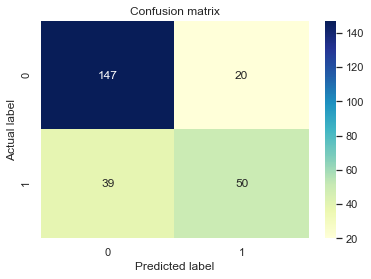

In [34]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

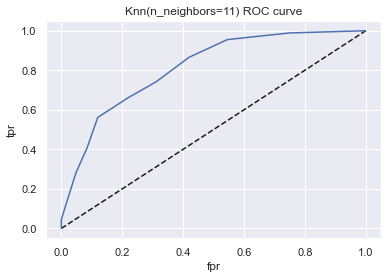

In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [37]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.8119154948529905

### Ridge Regression

In [38]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)

0.279427500764469

In [100]:
# cross validation
cross_val_ridge = cross_val_score(model_ridge,X_train,y_train,cv=5)
## cv=5 on parcourt tous le set 5 fois en séparant le test set du train set.
cross_val_ridge

array([0.31437235, 0.16246702, 0.31247506, 0.26834451, 0.31063046])

In [101]:
cross_val_ridge.mean()

0.2736578802675056

### SVM

In [102]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.7578125
Accuracy for SVM kernel= linear is 0.73046875


### LogisticRegression

In [103]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.73828125


In [44]:
cm = confusion_matrix(y_test, prediction)
cm

array([[141,  26],
       [ 41,  48]], dtype=int64)

Text(39.5, 0.5, 'Truth')

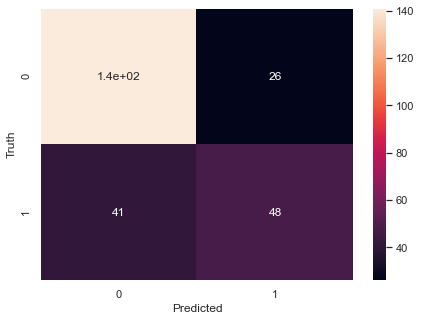

In [45]:
# plotting confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Comparing differents machine learning models 

In [48]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=11),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
KNN,0.769531
Radial Svm,0.757812
Logistic Regression,0.738281
Random forest,0.738281
Naive Bayes,0.738281
Linear Svm,0.730469
Decision Tree,0.691406


In [49]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)

# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)


### ROC Curve

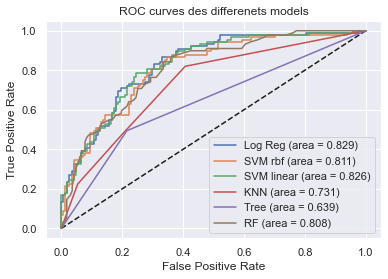

In [51]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves des differenets models')
plt.legend(loc='best')
plt.show()

## Recall vs Precision curve

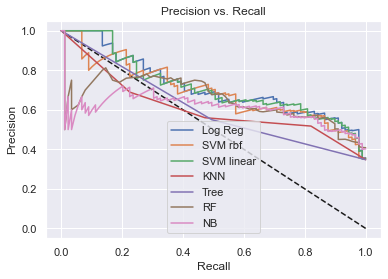

In [52]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# 6. Fine-tune your models and combine them into a great solution.

# Part II : Deep learning

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(2)

In [64]:
train_Y = to_categorical(y_train, num_classes = 2)
test_Y = to_categorical(y_test, num_classes = 2)

In [65]:
# Confirm the train-test split ratio
print(np.shape(X_train))
print(np.shape(train_Y))
print(np.shape(X_test))
print(np.shape(test_Y))

(512, 8)
(512, 2)
(256, 8)
(256, 2)


In [ ]:
from keras.utils import np_utils

for i in range(1,80):

    model = Sequential()

    model.add(Dense(i, input_dim=8, activation='relu'))

    model.add(Dense(i, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    scores = model.evaluate(X_test,y_test)

    print("\n  %s: %.2f  %%" %  (model.metrics_names[1], scores[1]*100))

    print("i" , i)

In [75]:
model = keras.Sequential([
layers.Dense(64, activation = 'relu', input_shape = [X_train.shape[1]]),
layers.Dropout(0.3, seed = 2),
layers.Dense(70, activation = 'sigmoid'),  
layers.Dense(64, activation = 'relu'),      
layers.Dense(64, activation = 'sigmoid'),     
layers.Dense(64, activation = 'relu'),     
layers.Dense(1)])

In [76]:
optimiseur = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(loss ='binary_crossentropy', optimizer = optimiseur,metrics = ['accuracy'])

In [77]:
history = model.fit(X_train, y_train, validation_split=0.20, epochs=100, verbose=2)

Epoch 1/100
13/13 - 2s - loss: 0.6752 - accuracy: 0.6284 - val_loss: 0.6509 - val_accuracy: 0.6019 - 2s/epoch - 142ms/step
Epoch 2/100
13/13 - 0s - loss: 0.6397 - accuracy: 0.6528 - val_loss: 0.6213 - val_accuracy: 0.6019 - 75ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 0.5793 - accuracy: 0.6870 - val_loss: 0.5776 - val_accuracy: 0.7670 - 68ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.7139 - accuracy: 0.6675 - val_loss: 0.5478 - val_accuracy: 0.7864 - 61ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.5179 - accuracy: 0.7433 - val_loss: 0.5164 - val_accuracy: 0.7670 - 75ms/epoch - 6ms/step
Epoch 6/100
13/13 - 0s - loss: 0.5464 - accuracy: 0.7506 - val_loss: 0.4940 - val_accuracy: 0.7767 - 75ms/epoch - 6ms/step
Epoch 7/100
13/13 - 0s - loss: 0.6846 - accuracy: 0.7311 - val_loss: 0.4769 - val_accuracy: 0.7864 - 80ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.5025 - accuracy: 0.7531 - val_loss: 0.6667 - val_accuracy: 0.7282 - 98ms/epoch - 8ms/step
Epoch 9/100
13/1

Epoch 68/100
13/13 - 0s - loss: 0.5724 - accuracy: 0.7848 - val_loss: 0.5950 - val_accuracy: 0.7864 - 82ms/epoch - 6ms/step
Epoch 69/100
13/13 - 0s - loss: 0.5427 - accuracy: 0.7946 - val_loss: 1.0471 - val_accuracy: 0.7573 - 99ms/epoch - 8ms/step
Epoch 70/100
13/13 - 0s - loss: 0.5996 - accuracy: 0.8020 - val_loss: 1.0320 - val_accuracy: 0.7573 - 90ms/epoch - 7ms/step
Epoch 71/100
13/13 - 0s - loss: 0.5196 - accuracy: 0.7897 - val_loss: 0.8986 - val_accuracy: 0.7767 - 96ms/epoch - 7ms/step
Epoch 72/100
13/13 - 0s - loss: 0.6006 - accuracy: 0.7800 - val_loss: 0.5802 - val_accuracy: 0.7670 - 84ms/epoch - 6ms/step
Epoch 73/100
13/13 - 0s - loss: 0.5222 - accuracy: 0.7848 - val_loss: 0.6280 - val_accuracy: 0.7961 - 81ms/epoch - 6ms/step
Epoch 74/100
13/13 - 0s - loss: 0.5568 - accuracy: 0.7971 - val_loss: 0.6123 - val_accuracy: 0.7961 - 86ms/epoch - 7ms/step
Epoch 75/100
13/13 - 0s - loss: 0.6015 - accuracy: 0.8044 - val_loss: 0.7835 - val_accuracy: 0.7864 - 93ms/epoch - 7ms/step
Epoch 76

In [78]:
data = {"Age":float(57), "BloodPressure	":float(80.0),"SkinThickness":float(0.0), "Insulin":float(0.0), "BMI": float(27.1), "Glucose": float(139.0), "DiabetesPedigreeFunction": float(1.441), "Pregnancies": float(10)}
df=pd.DataFrame(data=data,index=[0])
output=model.predict(df)
print(output[0])

[1.1158547]


In [110]:
mod.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                576       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 70)                4550      
                                                                 
 dense_80 (Dense)            (None, 64)                4544      
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dense_83 (Dense)            (None, 1)               